# Used car price prediction

# Objective

There is a huge demand for used cars in the Indian Market today.Cars4U is a budding tech start-up that aims to find footholes in this market.We have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

## Dataset description

1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Citiesr> 4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
10. Engine : The displacement volume of the engine in CC.
11. Power : The maximum power of the engine in bhp.
12. Seats : The number of seats in the car.
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [1]:
# !pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno 
import plotly.express as px
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor


In [3]:
data = pd.read_csv('used_cars_data.csv')
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [4]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


# Data Understanding

In [5]:
data.shape

(7253, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [7]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [8]:
print ("\nUnique values :  \n\n", data.nunique())


Unique values :  

 Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64


<Axes: >

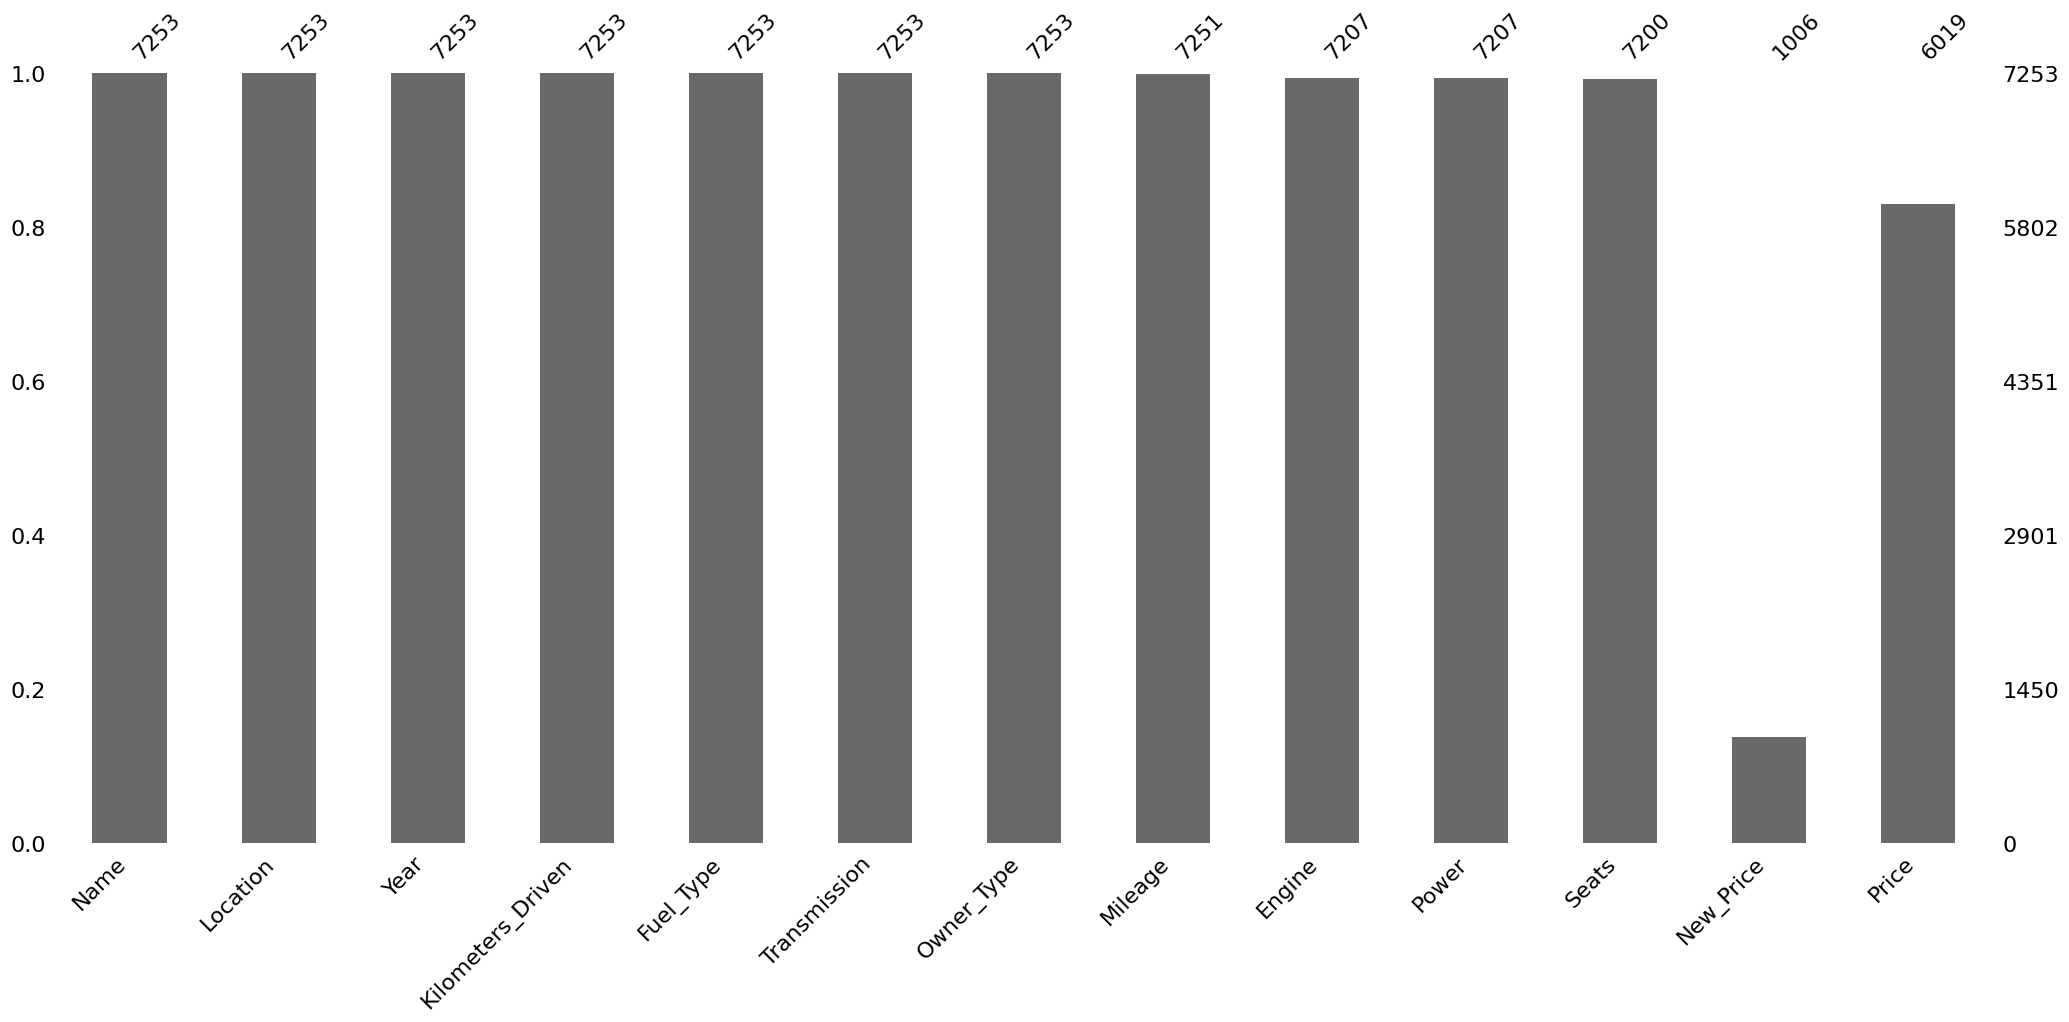

In [9]:
msno.bar(data)

Observations

This preview shows that some columns potentially have a lot of missingness New_Price has only 1006 values. 86 % values are missing

Price, which is a Target variable 17 % missing values.

Seats has only 53 values missing and number of seats can be one of key factor in deciding price.

Power and Engine has 46 missing values.

Mileage only has two values missing.

Mileage,Power,Engine,New_Price we know are quantitative variables but are of object dtype here and needs to to converted to numeric.

In [10]:
num = data.select_dtypes('number').columns.tolist()
cat = data.select_dtypes('object').columns.tolist()

In [11]:
num

['Year', 'Kilometers_Driven', 'Seats', 'Price']

In [12]:
cat

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'New_Price']

In [13]:
cat_col = [
    "Fuel_Type",
    "Location",
    "Transmission",
    "Seats",
    "Year",
    "Owner_Type",
    
]
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
----------------------------------------
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
----------------------------------------
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
----------------------------------------
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64
----------------------------------------
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: 

Observations

Maximum car being sold have fuel type as Diesel.

Mumbai has highest numbers of car availabe for purchase.

5204 cars with Manual transmission are available for purchase.

Most of the cars are 5 seaters and First owned.

Years of car ranges form 1996- 2015

# Data Preprocessing

Processing Engine,Power ,Mileage columns¶

In [14]:
data[['Engine','Power','Mileage']].sample(10)

,Engine,Power,Mileage
2385,1086 CC,62.1 bhp,13.45 km/kg
6690,1493 CC,110 bhp,18.1 kmpl
6507,2523 CC,62.1 bhp,15.96 kmpl
4578,2494 CC,100.6 bhp,12.99 kmpl
2712,814 CC,55.2 bhp,21.1 kmpl
6700,1498 CC,98.6 bhp,25.5 kmpl
3443,2494 CC,102 bhp,12.8 kmpl
3867,2143 CC,136 bhp,17.9 kmpl
6751,2982 CC,171 bhp,11.5 kmpl
2406,2982 CC,168.5 bhp,13.0 kmpl


In [15]:
typeoffuel=['CNG','LPG']
data.loc[data.Fuel_Type.isin(typeoffuel)].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.25
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,1.40
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN,4.70
839,Maruti Alto Green LXi (CNG),Delhi,2012,65537,CNG,Manual,First,26.83 km/kg,796 CC,38.4 bhp,5.0,NaN,2.10
893,Hyundai Accent Executive CNG,Hyderabad,2010,95637,CNG,Manual,Second,13.2 km/kg,1495 CC,93.7 bhp,5.0,NaN,1.90
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,NaN,2.85
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,NaN,1.45
1135,Maruti Zen Estilo LXI Green (CNG),Ahmedabad,2011,76000,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,2.00


Power has some values as "nullbhp" .Mileage also has some observations as 0. For fuel type and CNG and LPG mileage is measured in km/kg where as for other type it is measured in kmpl. Since those units are in km for both of them no need of conversion . Dropping units from mileages,Engine and Power.

 Mileage

In [16]:
data[data.Mileage.isnull()==True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [17]:

data["Mileage"] = data["Mileage"].str.rstrip(" kmpl")
data["Mileage"] = data["Mileage"].str.rstrip(" km/g")


Engine

In [18]:
data["Engine"] = data["Engine"].str.rstrip(" CC")

Power

In [19]:

data["Power"] = data["Power"].str.rstrip(" bhp")
data["Power"]= data["Power"].replace(regex="null", value = np.nan)

In [20]:
num=['Engine','Power','Mileage']
data[num].sample(20)

,Engine,Power,Mileage
6327,1582,126.2,19.67
88,1197,82,18.9
684,1396,88.73,22.54
4348,1995,154,12.05
2478,1496,88.8,17.6
6890,1498,98.63,24.4
573,2523,62.1,15.96
2389,2179,140,16.0
5998,1198,73.9,17.24
4262,1199,88.7,18.7


 values in Power and Mileage as 0.0 so verifying data for Engine, Power, Mileage. Will check once again after converting datatype

In [21]:
data.query("Power == '0.0'")['Power'].count()

0

In [22]:
data.query("Mileage == '0.0'")['Mileage'].count()

81

In [23]:
data.loc[data["Mileage"]=='0.0','Mileage']=np.nan

In [24]:
data.loc[data["Engine"]=='0.0','Engine'].count()

0

In [25]:
data[num].nunique()

Engine     150
Power      385
Mileage    437
dtype: int64

In [26]:
data[num].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

46 missing value in Engine ,175 missing value in power and 83 missing value in mileage

Processing Seats

In [27]:
data.query("Seats == 0.0")['Seats'].count()

1

In [28]:
data.loc[3999,'Seats'] =np.nan

In [29]:
import re

new_price_num = []

regex_power = "^\d+(\.\d+)? Lakh$"

for observation in data["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
           
            print(
                "The data needs furthur processing.mismatch ",
                observation,
            )
    else:
        new_price_num.append(np.nan)

The data needs furthur processing.mismatch  1.28 Cr
The data needs furthur processing.mismatch  1.04 Cr
The data needs furthur processing.mismatch  1 Cr
The data needs furthur processing.mismatch  1.04 Cr
The data needs furthur processing.mismatch  1.39 Cr
The data needs furthur processing.mismatch  1.02 Cr
The data needs furthur processing.mismatch  1.4 Cr
The data needs furthur processing.mismatch  1.06 Cr
The data needs furthur processing.mismatch  1.27 Cr
The data needs furthur processing.mismatch  1.13 Cr
The data needs furthur processing.mismatch  1.36 Cr
The data needs furthur processing.mismatch  1.66 Cr
The data needs furthur processing.mismatch  1.6 Cr
The data needs furthur processing.mismatch  1.28 Cr
The data needs furthur processing.mismatch  2.3 Cr
The data needs furthur processing.mismatch  1.71 Cr
The data needs furthur processing.mismatch  1.39 Cr
The data needs furthur processing.mismatch  1.58 Cr
The data needs furthur processing.mismatch  3.75 Cr
The data needs fur

In [30]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,NaN,NaN


In [31]:

new_price_num = []

for observation in data["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
        new_price_num.append(np.nan)

data["new_price_num"] = new_price_num
data.head(5)  

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74,NaN


# Feature Enginering

converting datatype

In [32]:
#converting object data type to category data type
data["Fuel_Type"] = data["Fuel_Type"].astype("category")
data["Transmission"] = data["Transmission"].astype("category")
data["Owner_Type"] = data["Owner_Type"].astype("category")
#converting int data type to float  
data["Mileage"] = data["Mileage"].astype(float)
data["Power"] = data["Power"].astype(float)
data["Engine"]=data["Engine"].astype(float)

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7170.0,18.346527,4.157910,6.40,15.300,18.20,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7199.0,5.280456,0.809327,2.00,5.000,5.00,5.0000,10.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00
new_price_num,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00


In [34]:
data['Current_year']=2023
data['Ageofcar']=data['Current_year']-data['Year']
data.drop('Current_year',axis=1,inplace=True)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,NaN,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,NaN,8
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,8.61,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,NaN,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,NaN,10


Processing Name column

Brands do play an important role in Car selection and Prices. So extracting brand names from the Name.

In [35]:
filtered_data = data.dropna(subset=['Name'])
data['Name'] = filtered_data['Name']

In [36]:
 data['Brand'] = data['Name'].str.split(' ').str[0] 
data['Model'] = data['Name'].str.split(' ').str[1] + data['Name'].str.split(' ').str[2]

In [37]:
data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [38]:
col=['ISUZU','Isuzu','Mini','Land']
data[data.Brand.isin(col)].sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
3194,Mini Cooper 3 DOOR D,Kochi,2015,27641,Diesel,Automatic,Second,20.70,1496.0,113.98,4.0,34.89 Lakh,24.77,34.89,8,Mini,Cooper3
1568,Land Rover Discovery Sport TD4 HSE 7S,Mumbai,2017,40000,Diesel,Automatic,First,12.81,1999.0,148.31,7.0,66.39 Lakh,41.50,66.39,6,Land,RoverDiscovery
2604,Mini Cooper Convertible S,Mumbai,2016,15000,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,44.28 Lakh,35.00,44.28,7,Mini,CooperConvertible
3410,Land Rover Freelander 2 HSE SD4,Ahmedabad,2012,60000,Diesel,Automatic,Second,12.35,2179.0,187.74,5.0,NaN,23.50,NaN,11,Land,RoverFreelander
1352,Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel,Bangalore,2012,66538,Diesel,Automatic,First,10.20,4367.0,308.00,7.0,NaN,70.00,NaN,11,Land,RoverRange


Brand names like ISUZU and Isuzu are same and needs to be corrected. Land, Mini seems to be incorrect. So correcting brand names.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7170 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7199 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
 13  new_price_num      1006 non-null   float64 
 14  Ageofcar           7253 non-null   int64   
 15  Brand              7253 non-null   object  
 16  Model 

In [40]:
data.loc[data.Brand == 'ISUZU','Brand']='Isuzu'
data.loc[data.Brand=='Mini','Brand']='Mini Cooper'
data.loc[data.Brand=='Land','Brand']='Land Rover'


In [41]:
data.Brand.nunique()

32

In [42]:
data.groupby(data.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

In [43]:
data.Model.isnull().sum()

1

In [44]:
data.dropna(subset=['Model'],axis=0,inplace=True)


In [45]:
data.Model.nunique()

726

In [46]:
data.groupby('Model')['Model'].size().nlargest(30)

Model
SwiftDzire      189
Grandi10        179
WagonR          178
Innova2.5       145
Verna1.6        127
City1.5         122
Cityi           115
Creta1.6        110
NewC-Class      110
3Series         109
SwiftVDI         96
5Series          86
i201.2           78
SantroXing       76
XUV500W8         75
i10Sportz        75
AmazeS           69
i10Magna         69
Alto800          63
CorollaAltis     63
FigoDiesel       61
Ecosport1.5      59
A42.0            56
AltoK10          56
VitaraBrezza     55
i20Asta          54
InnovaCrysta     53
i20Sportz        53
Duster110PS      51
Fortuner4x2      50
Name: Model, dtype: int64

There are 726 unique models and Swift Dzire is most popular Model.

# EDA

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   object  
 1   Location           7252 non-null   object  
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7169 non-null   float64 
 8   Engine             7206 non-null   float64 
 9   Power              7077 non-null   float64 
 10  Seats              7198 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
 13  new_price_num      1006 non-null   float64 
 14  Ageofcar           7252 non-null   int64   
 15  Brand              7252 non-null   object  
 16  Model 

In [48]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar
count,7252.000000,7.252000e+03,7169.000000,7206.000000,7077.000000,7198.000000,6019.000000,1006.000000,7252.000000
mean,2013.366520,5.870026e+04,18.347106,1616.605051,112.768713,5.280495,9.479468,22.779692,9.633480
std,3.253162,8.443348e+04,4.157912,595.320408,53.496523,0.809376,11.187917,27.759344,3.253162
min,1996.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000,3.910000,4.000000
25%,2011.000000,3.400000e+04,15.300000,1198.000000,75.000000,5.000000,3.500000,7.885000,7.000000
50%,2014.000000,5.342900e+04,18.200000,1493.000000,94.000000,5.000000,5.640000,11.570000,9.000000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,9.950000,26.042500,12.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000,375.000000,27.000000


Observations

Years is left skewed. Years ranges from 1996- 2019 . Age of cars 2 year old to 25 years old

Kilometer driven , median is ~53k Km and mean is ~58K. Max values seems to be 6500000. This is very high , and seems to be outlier. Need to analyze further.

Mileage is almost Normally distrubuited

Engine is right skewed and has outliers on higher and lower end

Power and Price are also right skewed.

Price 160 Lakh is too much for a used car. Seems to be an outlier.

C:\Users\maity\AppData\Local\Temp\ipykernel_17532\1941123707.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable],kde=False,color='blue')


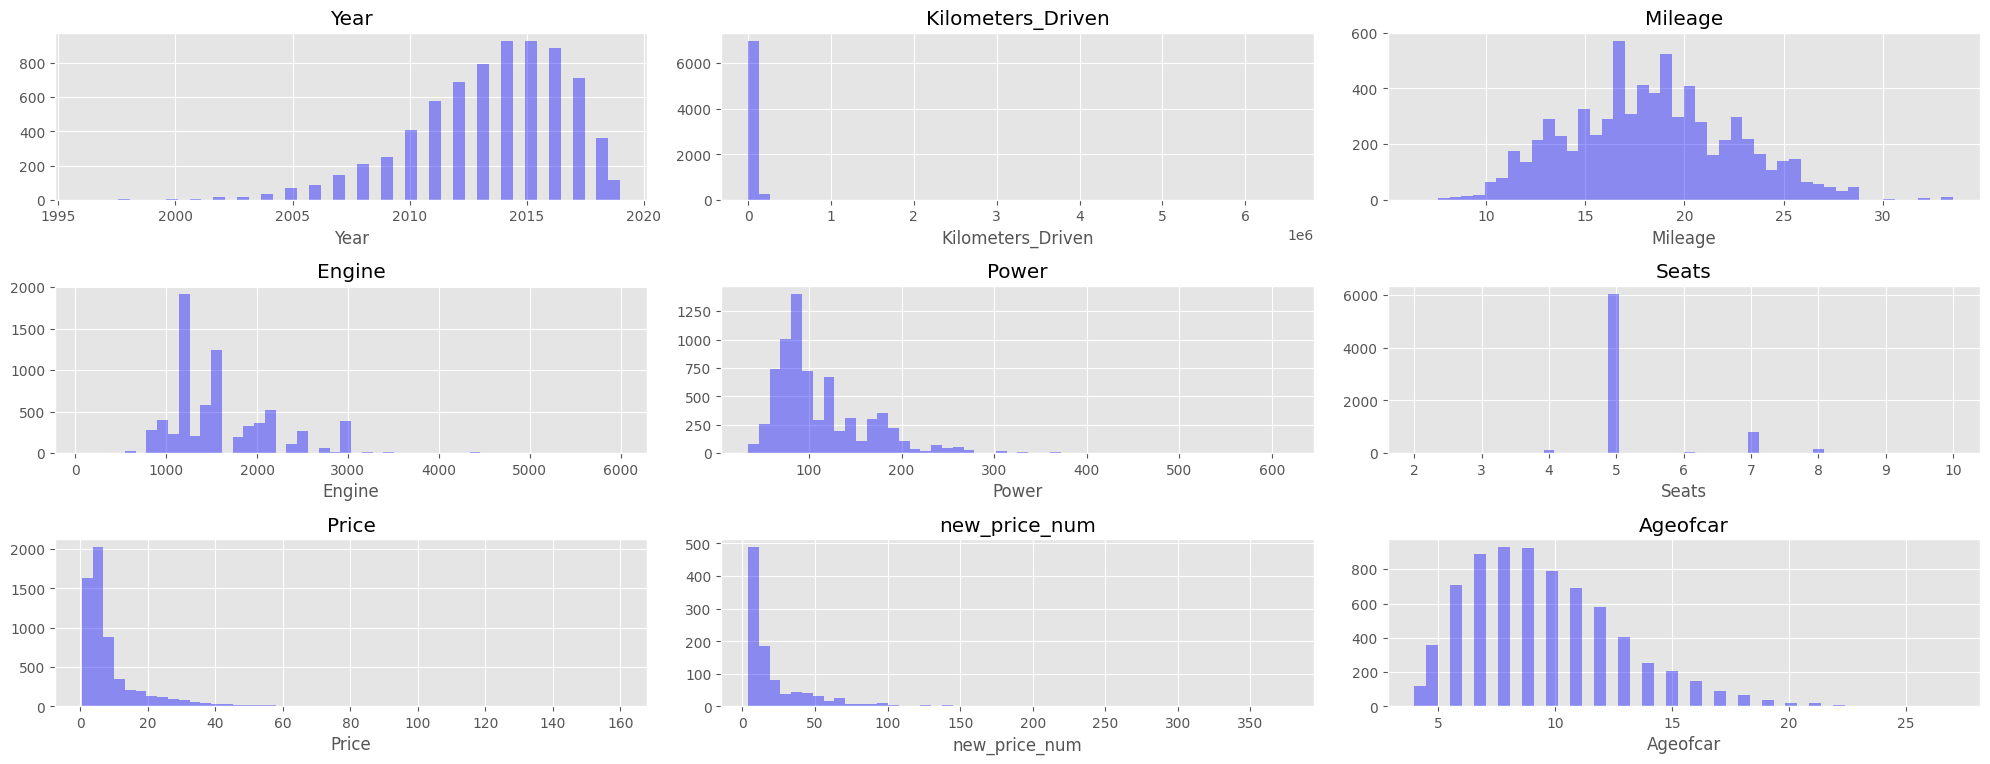

In [49]:
plt.style.use('ggplot')

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(data[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)


Observations

Year is left skewed and has outilers on lower side., This column can be dropped

Kilometer_driven is right skewed.

Mileage is almost Normally distrubuted. Has few outliers on upper and lower side. need to check further.

Engine ,power and price are right skewed and has outliers on upper side.

Age of car is right skewed.

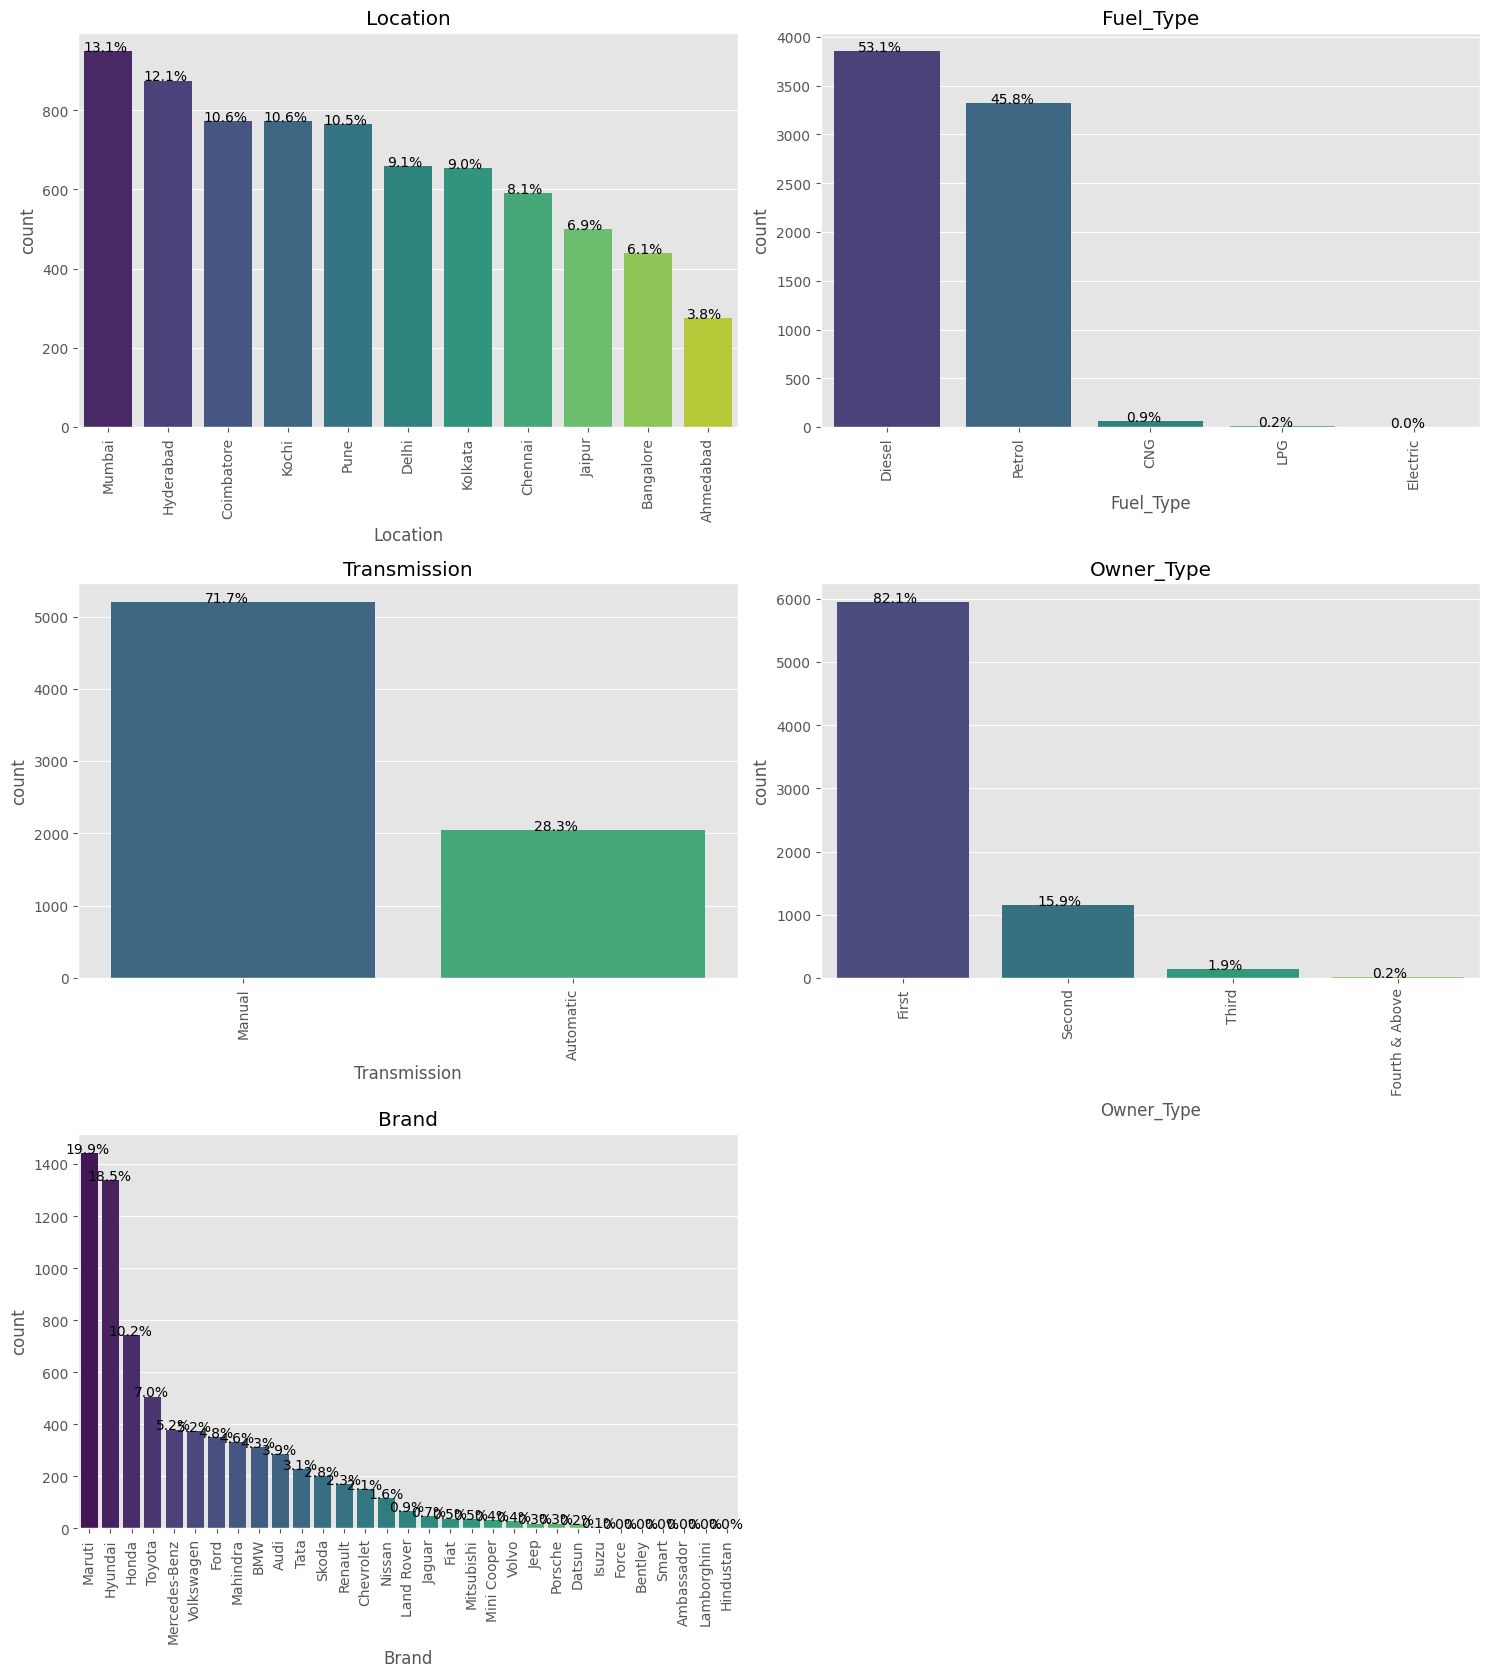

In [50]:
cat_columns=['Location','Fuel_Type','Transmission', 'Owner_Type', 'Brand'] 

plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = data[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=data[variable], data=data , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

Observations

Car Profile

71 % cars available for sell have manual Transmission.

82 % cars are First owned cars.

39% of car available for sale are from Maruti & Hyundai brands.

53% of car being sold/avialable for purchase have fuel type as Diesel .

Mumbai has highest numbers of car availabe for purchase whereas Ahmedabad has least

Most of the cars are 5 seaters.

Car being sold/available for purchase are in 2 - 23 years old

71% car are lower price range car.

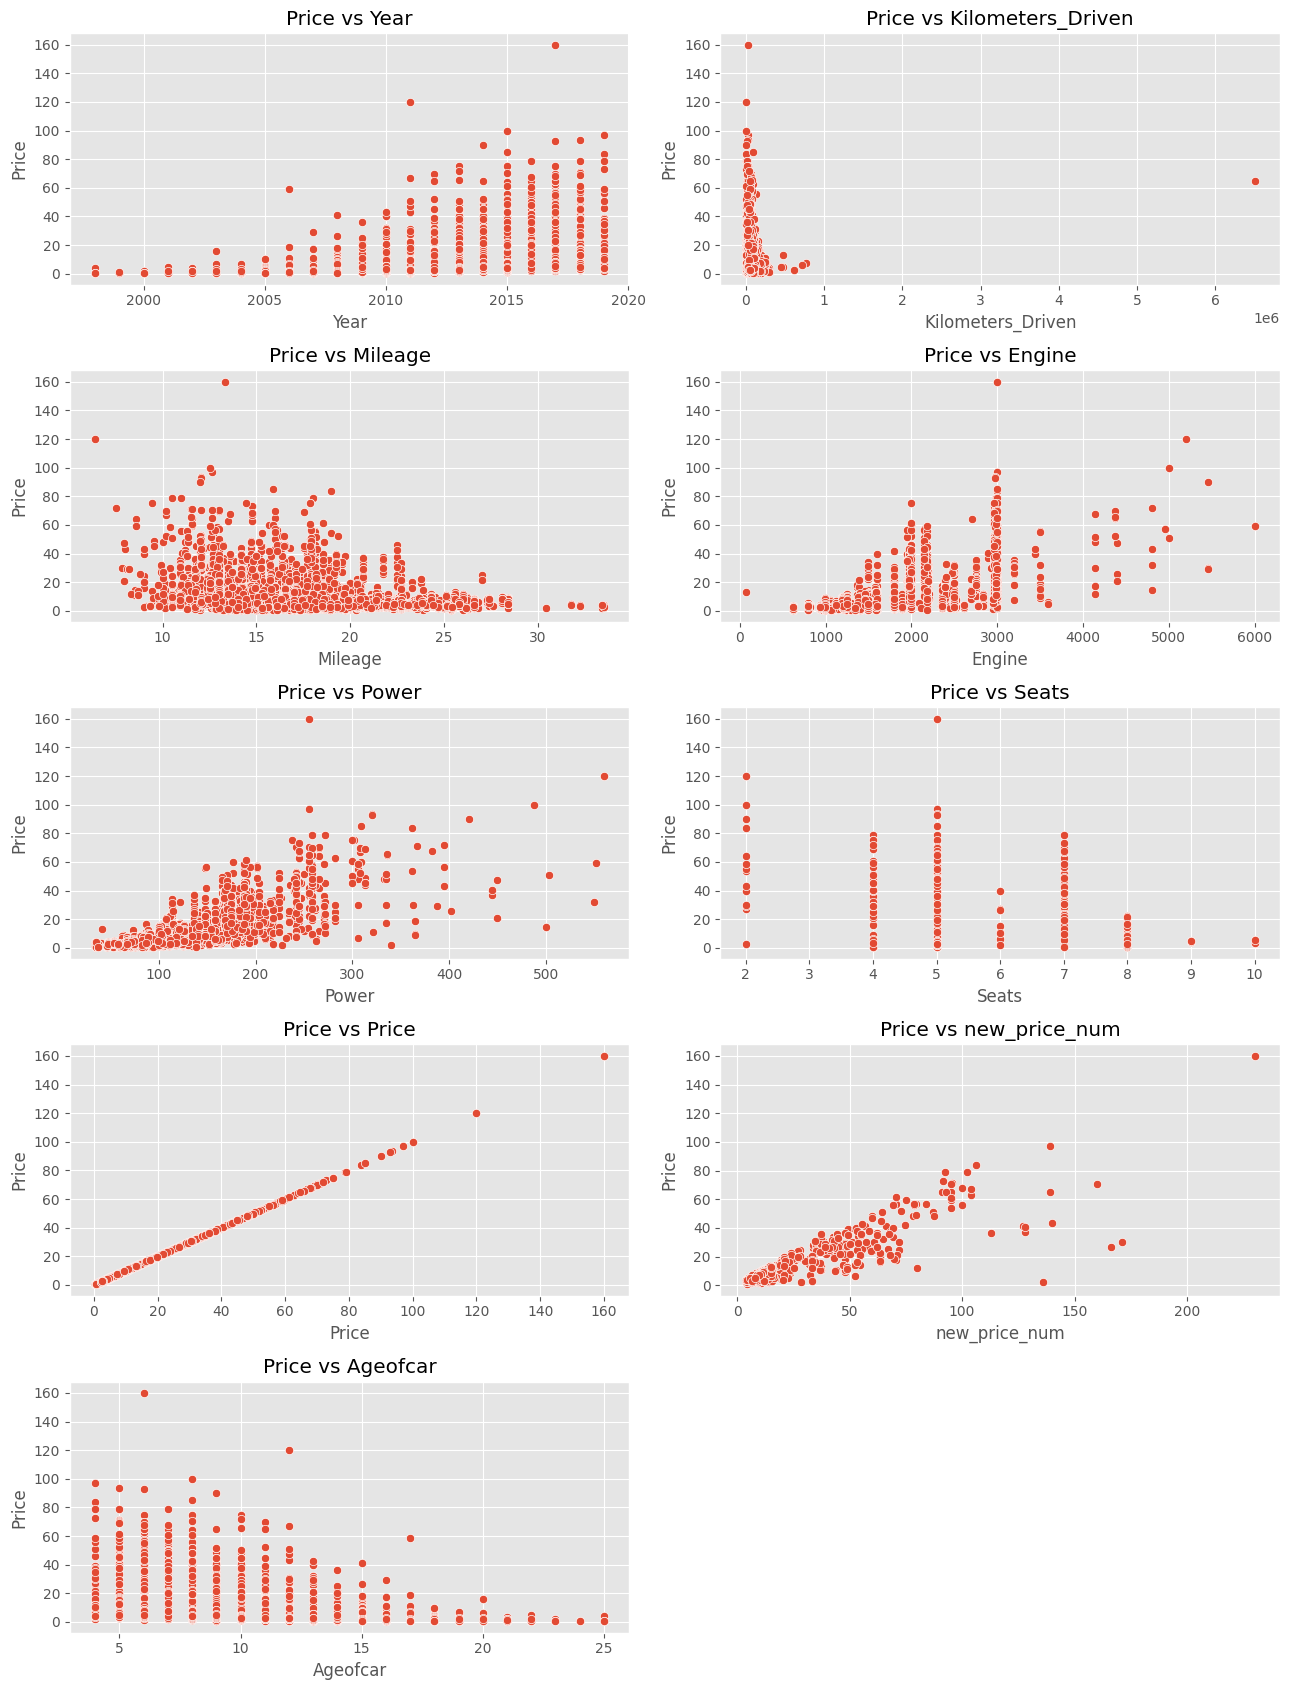

In [51]:
numeric_columns= numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=data[variable],y=data['Price']).set(title='Price vs '+ variable)
                     plt.tight_layout()

# Handling missing values

In [52]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
New_Price            6246
Price                1233
new_price_num        6246
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

In [53]:
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

2    5025
3    1112
0     819
1     187
4      57
5      31
6      20
7       1
dtype: int64

In [54]:

for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = data[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

****************************** 
For the rows with exactly 1 missing values, NAs are found in:
Mileage      5
Price      182
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
New_Price        5025
new_price_num    5025
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
Mileage            25
Power              74
Seats               1
New_Price        1112
Price            1012
new_price_num    1112
dtype: int64



****************************** 
For the rows with exactly 4 missing values, NAs are found in:
Mileage          35
Power            50
Seats             6
New_Price        57
Price            23
new_price_num    57
dtype: int64



****************************** 
For the rows with exactly 5 missing values, NAs are found in:
Mileage           6
Engine           25
Power            30
Seats            26
New_Price        31
Price             6
new_price_num    31


In [55]:
data[num_missing==7]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,Mahindra,TUV300


In [56]:
col=['Engine','Power','Mileage']
data[col].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

In [57]:
data.groupby(['Name','Year'])['Engine'].median().head(30)

Name                                           Year
Ambassador Classic Nova Diesel                 2003    1489.0
Audi A3 35 TDI Attraction                      2014    1968.0
Audi A3 35 TDI Premium                         2016    1968.0
Audi A3 35 TDI Premium Plus                    2015    1968.0
                                               2016    1968.0
Audi A3 35 TDI Technology                      2017    1968.0
Audi A4 1.8 TFSI                               2010    1781.0
                                               2011    1781.0
Audi A4 1.8 TFSI Technology Edition            2012    1798.0
Audi A4 2.0 TDI                                2009    1968.0
                                               2011    1968.0
                                               2012    1968.0
                                               2013    1968.0
                                               2014    1968.0
Audi A4 2.0 TDI 177 Bhp Premium Plus           2013    1968.0
                  

In [58]:
data['Engine']=data.groupby(['Name','Year'])['Engine'].apply(lambda x:x.fillna(x.median()))
data['Power']=data.groupby(['Name','Year'])['Power'].apply(lambda x:x.fillna(x.median()))
data['Mileage']=data.groupby(['Name','Year'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [59]:
col=['Engine','Power','Mileage']
data[col].isnull().sum()

Engine      45
Power      162
Mileage     82
dtype: int64

In [60]:
data.groupby(['Brand','Model'])['Engine'].median().head(10)

Brand       Model      
Ambassador  ClassicNova    1489.0
Audi        A335           1968.0
            A41.8          1781.0
            A42.0          1968.0
            A43.0          2967.0
            A43.2          3197.0
            A430           1395.0
            A435           1968.0
            A4New          1968.0
            A62.0          1968.0
Name: Engine, dtype: float64

In [61]:
data.groupby(['Brand','Model'])['Engine'].median().head(10)

Brand       Model      
Ambassador  ClassicNova    1489.0
Audi        A335           1968.0
            A41.8          1781.0
            A42.0          1968.0
            A43.0          2967.0
            A43.2          3197.0
            A430           1395.0
            A435           1968.0
            A4New          1968.0
            A62.0          1968.0
Name: Engine, dtype: float64

As we can see most of the model have same engine size and instead of just applying median , grouping with model and year that should give me more granularity, and near to accurate Engine values.

In [62]:
data['Engine']=data.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))

In [63]:
data['Power']=data.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))

In [64]:
data['Mileage']=data.groupby(['Brand','Model'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [65]:
col=['Engine','Power','Mileage']
data[col].isnull().sum()

Engine     18
Power      63
Mileage    32
dtype: int64

In [66]:
data.groupby(['Model', 'Year'])['Engine'].agg(['median', 'mean', 'max']).sort_values(by='Model', ascending=True).head(10)

median         mean     max
Model   Year                             
1000AC  1998   970.0   970.000000   970.0
1Series 2013  1995.0  1995.000000  1995.0
        2015  1995.0  1995.000000  1995.0
370ZAT  2012  3696.0  3696.000000  3696.0
3Series 2018  1995.0  1995.000000  1995.0
        2017  1995.0  1995.000000  1995.0
        2016  1995.0  1995.000000  1995.0
        2015  1995.0  1995.000000  1995.0
        2014  1995.0  2078.166667  2993.0
        2013  1995.0  2066.428571  2993.0

In [67]:
data.groupby(['Brand','Engine'])['Power'].agg({'mean','median','max'}).head(10)

max  median        mean
Brand      Engine                            
Ambassador 1489.0   35.50   35.50   35.500000
Audi       1395.0  147.51  147.51  147.510000
           1781.0  163.20  163.20  163.200000
           1798.0  187.74  187.74  181.033333
           1968.0  187.74  174.33  167.123179
           1984.0  226.60  207.90  196.022000
           2698.0  179.50  179.50  179.500000
           2773.0  201.00  201.00  201.000000
           2894.0  444.00  444.00  444.000000
           2967.0  246.70  241.40  241.740000

In [68]:
data['Seats'].isnull().sum()

54

In [69]:
data['Seats']=data.groupby(['Name'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [70]:
data['Seats'].isnull().sum()

47

In [71]:
data['Seats']=data.groupby(['Model'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [72]:
data[data['Seats'].isnull()==True].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,2.11,NaN,13,Maruti,Swift1.3
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,NaN,1.75,NaN,17,Maruti,Swift1.3
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,5.80,NaN,8,Maruti,Swift1.3
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,3.15,NaN,12,Maruti,Swift1.3
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,4.70,NaN,8,Maruti,Swift1.3
2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,NaN,NaN,NaN,NaN,1.75,NaN,16,Maruti,Swift1.3
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50,NaN,15,Maruti,EstiloLXI
2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,4.24,NaN,9,Maruti,Swift1.3
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,NaN,NaN,NaN,NaN,2.35,NaN,17,Maruti,Swift1.3
3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,NaN,NaN,NaN,NaN,11.99,NaN,10,Honda,CR-VAT


In [73]:
#most of cars are 5 seater so fillrest of 23 by 5
data['Seats']=data['Seats'].fillna(5)

In [74]:
data["Location"] = data["Location"].astype("category")
data['Brand'] =data['Brand'].astype("category")

In [75]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                32
Engine                 18
Power                  63
Seats                   0
New_Price            6246
Price                1233
new_price_num        6246
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

# Processing New Price

In [76]:
data['new_price_num']=data.groupby(['Name','Year'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [77]:
data['new_price_num']=data.groupby(['Name'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [78]:
data['new_price_num']=data.groupby(['Brand','Model'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [79]:
data['new_price_num']=data.groupby(['Brand'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [80]:
data.drop(['New_Price'],axis=1,inplace=True)

In [81]:
data.new_price_num.isnull().sum()

158

In [82]:
data.groupby(['Brand'])['new_price_num'].median().sort_values(ascending=False)

Brand
Bentley          375.0000
Land Rover       139.0000
Porsche          136.0000
BMW               55.0700
Jaguar            53.7200
Audi              53.1400
Mercedes-Benz     49.4900
Volvo             45.6700
Mini Cooper       42.3000
Isuzu             33.6800
Mitsubishi        33.2100
Jeep              22.9500
Toyota            21.0850
Nissan            15.0600
Skoda             14.9225
Ford              11.4750
Renault           11.2700
Volkswagen        10.9400
Mahindra          10.9000
Honda              8.9200
Fiat               8.6250
Hyundai            8.2300
Tata               7.7000
Maruti             7.0000
Datsun             4.9800
Ambassador            NaN
Chevrolet             NaN
Force                 NaN
Hindustan             NaN
Lamborghini           NaN
Smart                 NaN
Name: new_price_num, dtype: float64

In [83]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                32
Engine                 18
Power                  63
Seats                   0
Price                1233
new_price_num         158
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

In [84]:
data.shape

(7252, 16)

In [85]:
cols1 = ["Power","Mileage","Engine"]

for ii in cols1:
    data[ii] = data[ii].fillna(data[ii].median())

In [86]:
data.dropna(inplace=True,axis=0)

In [87]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
new_price_num        0
Ageofcar             0
Brand                0
Model                0
dtype: int64

In [88]:
data.shape

(5892, 16)

Price

In [89]:
data.groupby(['Brand'])['Price'].agg({'median','mean','max'})

,max,mean,median
Brand,,,
Ambassador,NaN,NaN,NaN
Audi,72.94,25.537712,23.500
BMW,93.67,25.243146,21.000
Bentley,59.00,59.000000,59.000
Chevrolet,NaN,NaN,NaN
Datsun,3.95,3.049231,3.100
Fiat,7.71,3.269286,2.600
Force,NaN,NaN,NaN
Ford,56.80,6.889400,5.345


In [90]:
#using business knowledge to create class 
Low=['Maruti', 
     'Hyundai',
     'Ambassdor',
     'Hindustan',
     'Force',
     'Chevrolet',
     'Fiat',
     'Tata',
     'Smart',
     'Renault',
     'Datsun',
     'Mahindra',
     'Skoda',
     'Ford',
     'Toyota',
     'Isuzu',
     'Mitsubishi','Honda']
High=['Audi',
      'Mini Cooper',
      'Bentley',
      'Mercedes-Benz',
      'Lamborghini',
      'Volkswagen',
      'Porsche',
      'Land Rover',
      'Nissan',
      'Volvo',
      'Jeep',
      'Jaguar',
      'BMW']# more than 30lakh

In [91]:
def classrange(x):
    if x in Low:
        return "Low"
    elif x in High:
        return "High"
    else: 
        return x

In [92]:
data['Brand_Class'] = data['Brand'].apply(lambda x: classrange(x))

In [93]:
data['Brand_Class'].unique()

array(['Low', 'High'], dtype=object)

In [94]:
data['Engine']=data['Engine'].astype(int)
data['Brand_Class']=data["Brand_Class"].astype('category')

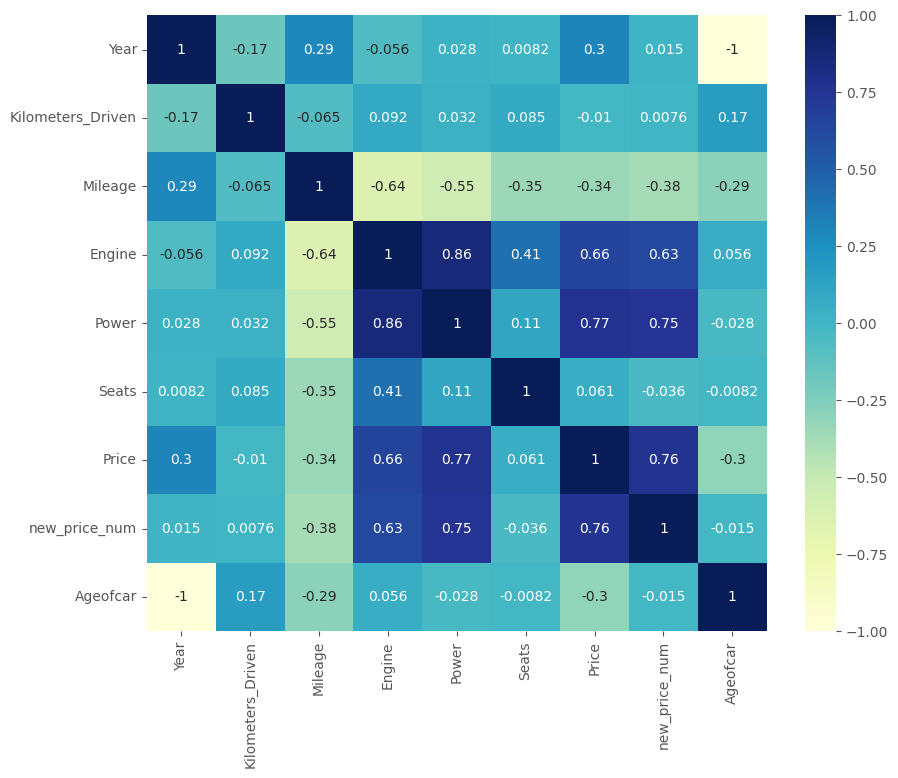

In [95]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True ,cmap="YlGnBu" )
plt.show()

Observations

Engine has strong positive correlation to Power [0.86].

Price has positive correlation to Engine[0.66] as well Power [0.77].

Mileage is negative correlated to Engine,Power,Price.,Ageofcar

Price has negative correlation to age of car.

Kilometer driven doesnt impact Price

# Variables that are correlated with Price variable

<Axes: title={'center': 'Price VS Engine based on Transmission'}, xlabel='Price', ylabel='Engine'>

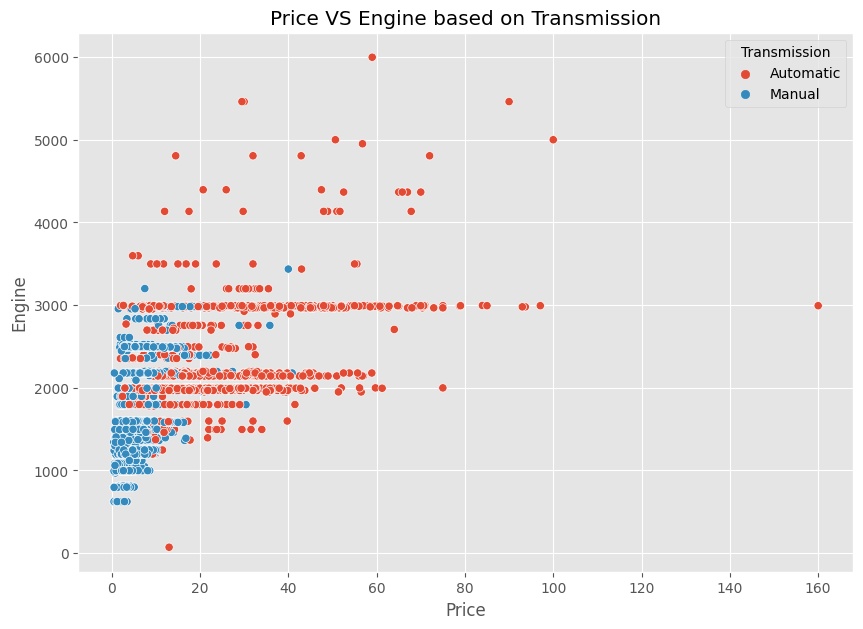

In [96]:
plt.figure(figsize=(10,7))

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price', hue='Transmission', data=data)

<Axes: title={'center': 'Price vs Power based on Transmission'}, xlabel='Price', ylabel='Power'>

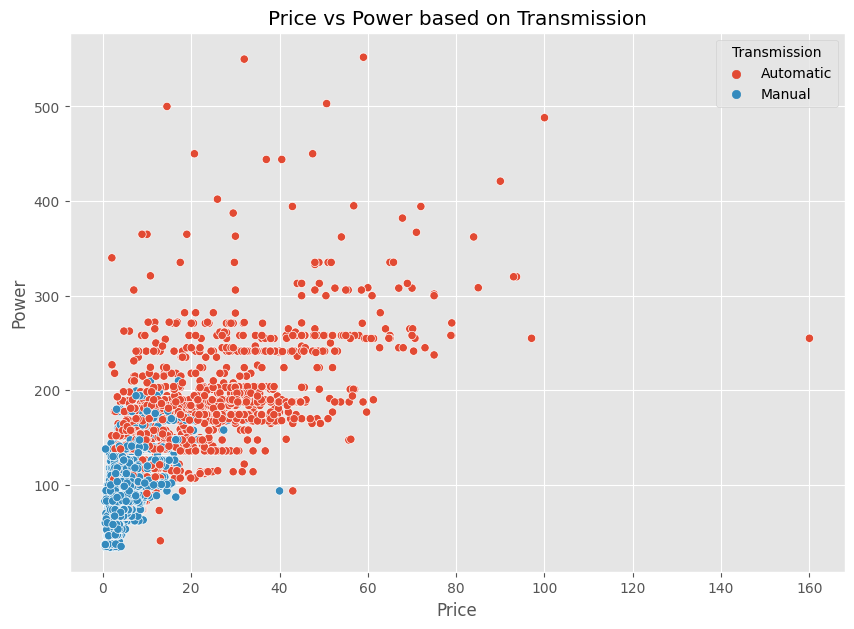

In [97]:
plt.figure(figsize=(10,7))
plt.title("Price vs Power based on Transmission")
sns.scatterplot(y='Power', x='Price', hue='Transmission', data=data)

<Axes: xlabel='Price', ylabel='Mileage'>

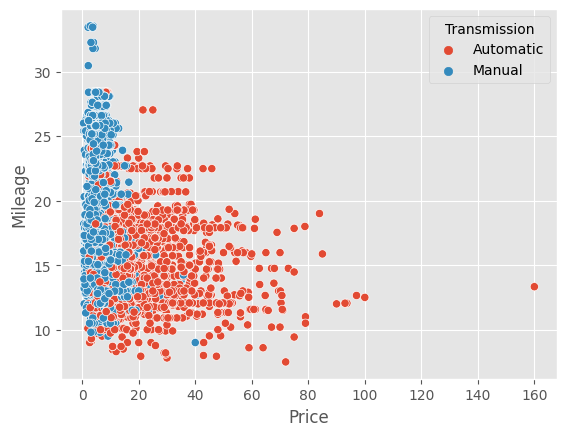

In [98]:
sns.scatterplot(y='Mileage', x='Price', hue='Transmission', data=data)

# Outlier Treatment

In [99]:
num = data.select_dtypes(include=np.number).columns.tolist()
num.remove(
    "Price"
) 

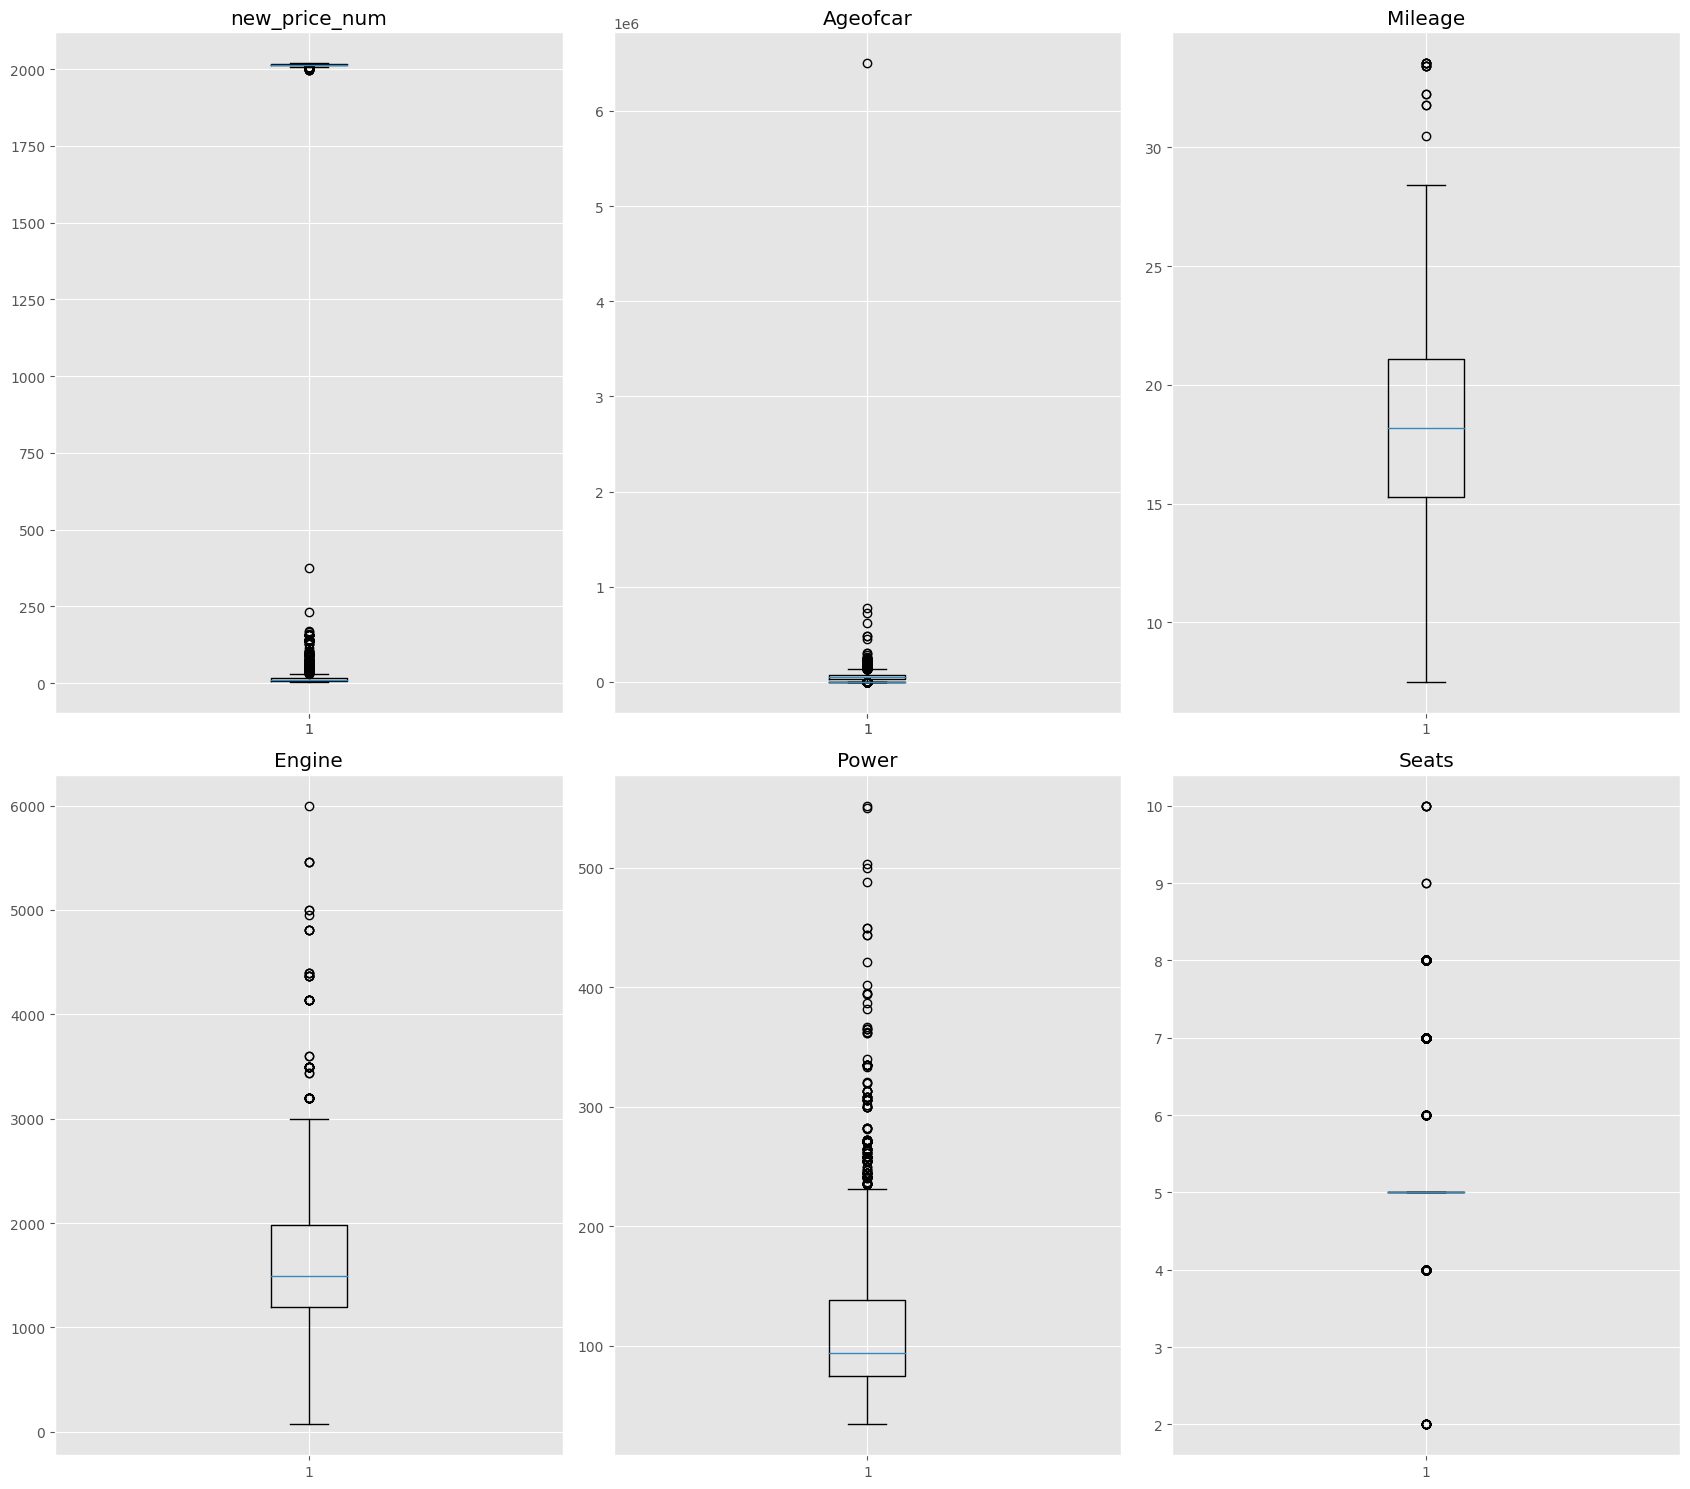

In [100]:
plt.figure(figsize=(17, 15))

for i, variable in enumerate(num):
    plt.subplot(2, 3, (i % 6) + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [101]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """

    Q1 = df[col].quantile(0.25)  # 1st quantile
    Q3 = df[col].quantile(0.75)  # 3rd quantile
    IQR = Q3 - Q1
    Lower_whisker = Q1 - 1.5 * IQR
    Upper_whisker = Q3 + 1.5 * IQR

    df[col] = np.clip(df[col], Lower_whisker, Upper_whisker)

    return df
def treat_outliers_all(df, col_list):

    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """

    for c in col_list:
        df = treat_outliers(df, c)
    return df

In [102]:
num.remove("Seats")

In [103]:
data = treat_outliers_all(
    data, num
) 

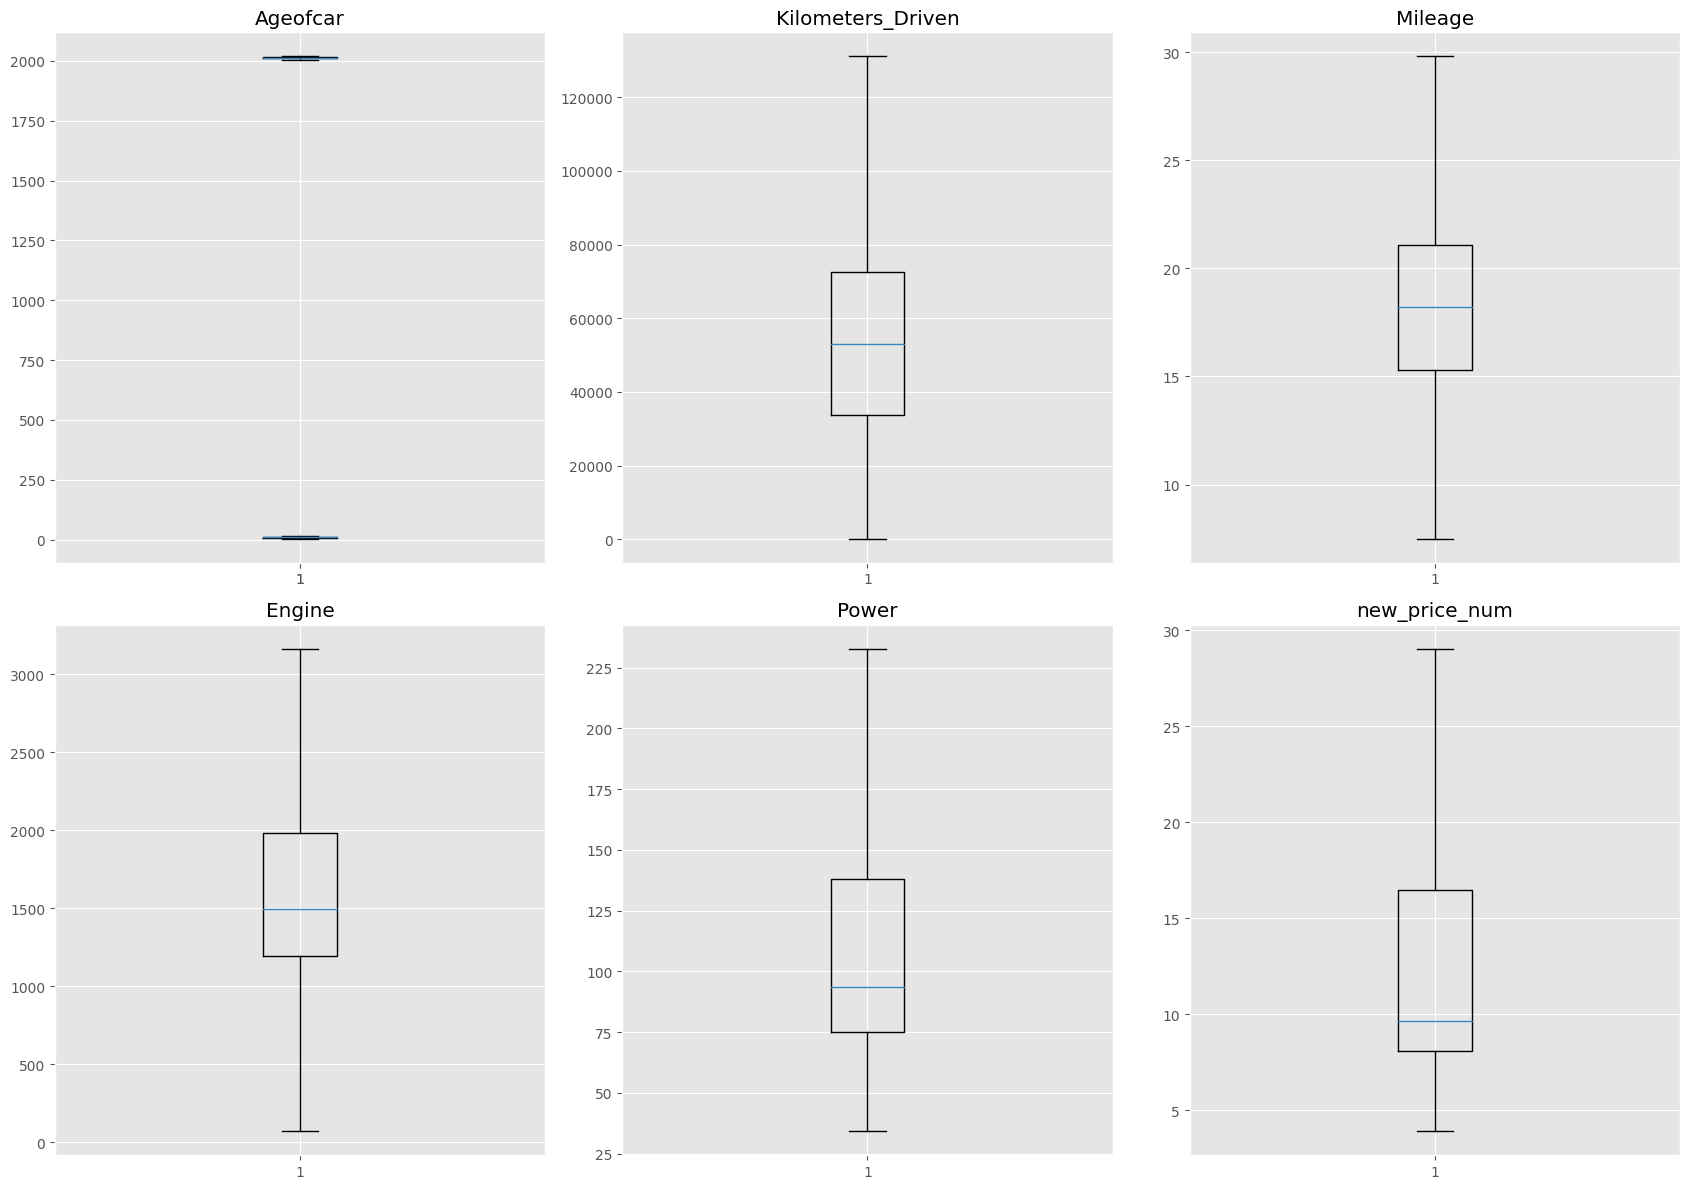

In [104]:
plt.figure(figsize=(17, 12))

for i, variable in enumerate(num):
    plt.subplot(2, 3, (i % 6) + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [105]:
data.shape

(5892, 17)

C:\Users\maity\AppData\Local\Temp\ipykernel_17532\3398276037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[colname], kde=True)


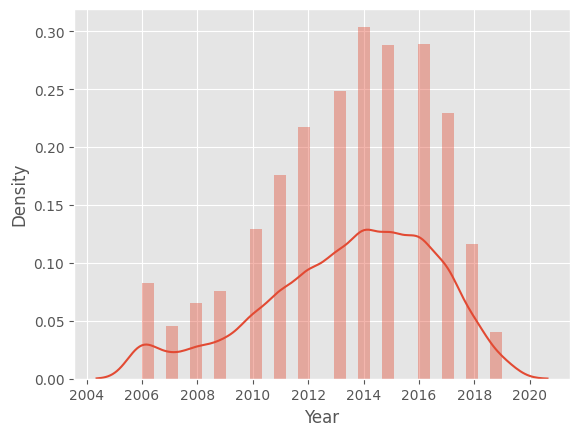

C:\Users\maity\AppData\Local\Temp\ipykernel_17532\3398276037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[colname], kde=True)


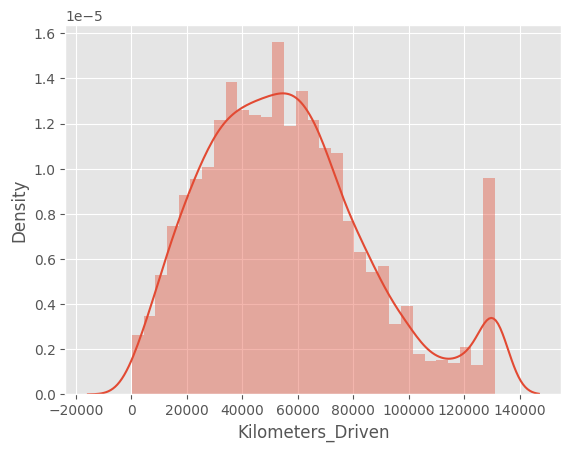

C:\Users\maity\AppData\Local\Temp\ipykernel_17532\3398276037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[colname], kde=True)


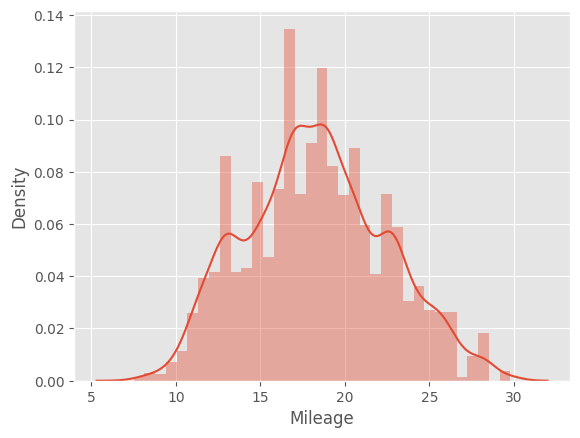

C:\Users\maity\AppData\Local\Temp\ipykernel_17532\3398276037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[colname], kde=True)


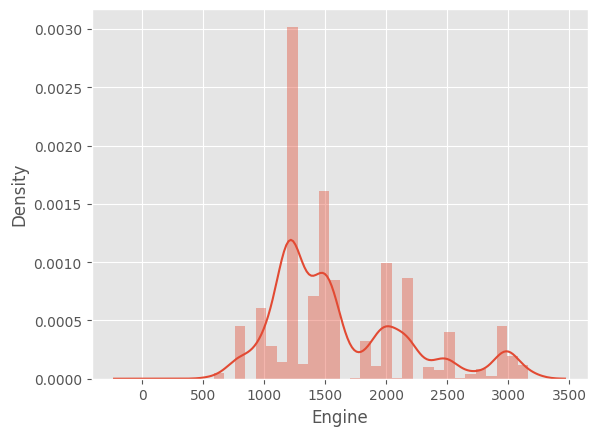

C:\Users\maity\AppData\Local\Temp\ipykernel_17532\3398276037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[colname], kde=True)


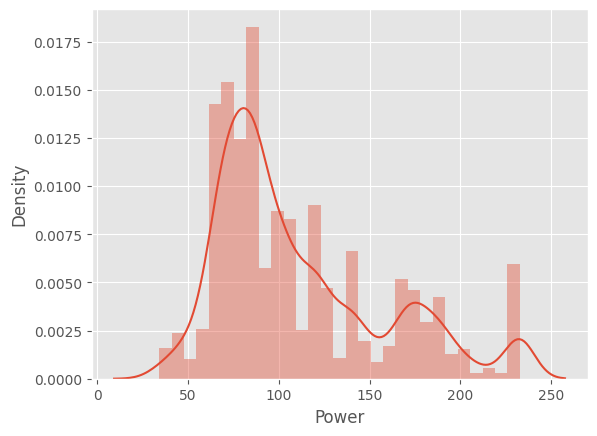

C:\Users\maity\AppData\Local\Temp\ipykernel_17532\3398276037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[colname], kde=True)


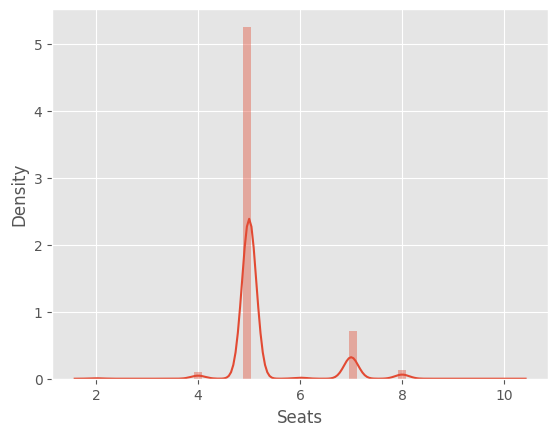

C:\Users\maity\AppData\Local\Temp\ipykernel_17532\3398276037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[colname], kde=True)


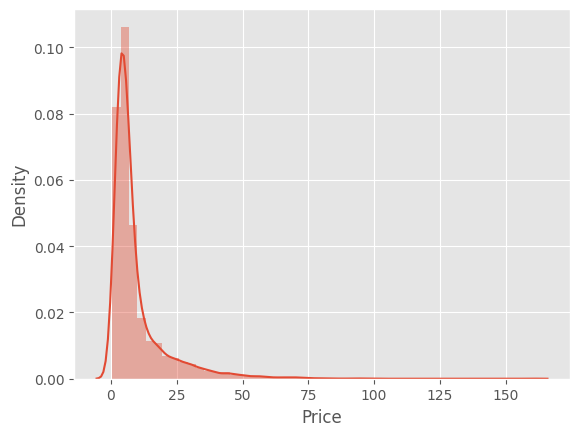

C:\Users\maity\AppData\Local\Temp\ipykernel_17532\3398276037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[colname], kde=True)


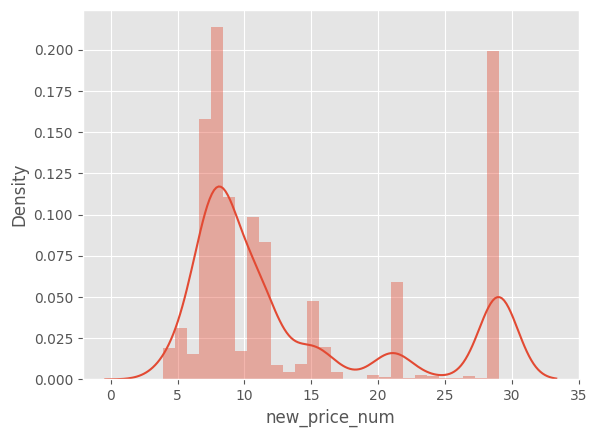

C:\Users\maity\AppData\Local\Temp\ipykernel_17532\3398276037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[colname], kde=True)


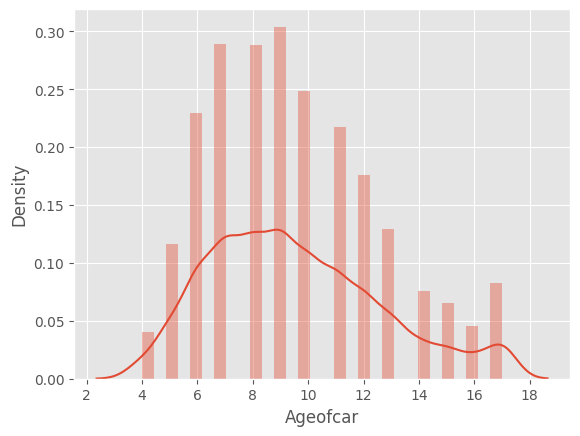

In [106]:
cols_to_log = data.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(data[colname], kde=True)
    plt.show()

In [107]:
def Perform_log_transform(df,col_log):
    """#Perform Log Transformation of dataframe , and list of columns """
    for colname in col_log:
        df[colname + '_log'] = np.log(df[colname])
#     df.drop(col_log, axis=1, inplace=True)
    df.info()

In [108]:
Perform_log_transform(data,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 0 to 6017
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   5892 non-null   object  
 1   Location               5892 non-null   category
 2   Year                   5892 non-null   float64 
 3   Kilometers_Driven      5892 non-null   float64 
 4   Fuel_Type              5892 non-null   category
 5   Transmission           5892 non-null   category
 6   Owner_Type             5892 non-null   category
 7   Mileage                5892 non-null   float64 
 8   Engine                 5892 non-null   float64 
 9   Power                  5892 non-null   float64 
 10  Seats                  5892 non-null   float64 
 11  Price                  5892 non-null   float64 
 12  new_price_num          5892 non-null   float64 
 13  Ageofcar               5892 non-null   float64 
 14  Brand                  5892 non-null   c

In [109]:
data.drop(['Name','Model','Year','Brand'],axis=1,inplace=True)

In [110]:
#data.drop(['Name','Model','Year','Brand','new_price_num'],axis=1,inplace=True)

In [111]:
data.drop(['Kilometers_Driven','Price'],axis=1,inplace=True)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 0 to 6017
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               5892 non-null   category
 1   Fuel_Type              5892 non-null   category
 2   Transmission           5892 non-null   category
 3   Owner_Type             5892 non-null   category
 4   Mileage                5892 non-null   float64 
 5   Engine                 5892 non-null   float64 
 6   Power                  5892 non-null   float64 
 7   Seats                  5892 non-null   float64 
 8   new_price_num          5892 non-null   float64 
 9   Ageofcar               5892 non-null   float64 
 10  Brand_Class            5892 non-null   category
 11  Kilometers_Driven_log  5892 non-null   float64 
 12  Price_log              5892 non-null   float64 
dtypes: category(5), float64(8)
memory usage: 444.1 KB


In [113]:
X = data.drop(["Price_log"], axis=1)
y = data["Price_log"]

In [114]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x

In [115]:
X = encode_cat_vars(X)
X.head()

,Mileage,Engine,Power,Seats,new_price_num,Ageofcar,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Class_Low
0,26.60,998.0,58.16,5.0,5.29,13.0,11.184421,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,19.67,1582.0,126.20,5.0,16.06,8.0,10.621327,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,18.20,1199.0,88.70,5.0,8.61,12.0,10.736397,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,20.77,1248.0,88.76,7.0,11.27,11.0,11.373663,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,15.20,1968.0,140.80,5.0,29.02,10.0,10.613246,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (4124, 26)
X_test: (1768, 26)
y_train: (4124,)
y_test: (1768,)


# Base Model

In [117]:
import statsmodels.api as sm

In [118]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train, X_train)
    return olsmodel.fit()


In [119]:
olsmodel1 = build_ols_model(X_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1684.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:33:26   Log-Likelihood:                -206.94
No. Observations:                4124   AIC:                             467.9
Df Residuals:                    4097   BIC:                             638.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [120]:
X.columns

Index(['Mileage', 'Engine', 'Power', 'Seats', 'new_price_num', 'Ageofcar',
       'Kilometers_Driven_log', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Class_Low'],
      dtype='object')

# OLS model after dropping insignificant feature

In [121]:
X1 = X.drop(["Mileage","Seats","Location_Chennai","Location_Kochi","Fuel_Type_LPG","Owner_Type_Fourth & Above","Fuel_Type_Petrol","Power"], axis=1)

In [122]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

In [123]:
X1_train = sm.add_constant(X1_train)
X1_test = sm.add_constant(X1_test)


def build_ols_model(train):
   
    olsmodel = sm.OLS(y_train, X1_train)
    return olsmodel.fit()

In [124]:
olsmodel2 = build_ols_model(X1_train)
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1894.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:33:26   Log-Likelihood:                -677.21
No. Observations:                4124   AIC:                             1392.
Df Residuals:                    4105   BIC:                             1513.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.53

# Test Assumptions of OLS

No Multicollinearity

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

In [126]:
print(checking_vif(X1_train))


                  feature         VIF
0                   const  340.848034
1                  Engine    2.636488
2           new_price_num    4.342575
3                Ageofcar    1.818981
4   Kilometers_Driven_log    1.748502
5      Location_Bangalore    1.207926
6     Location_Coimbatore    1.342146
7          Location_Delhi    1.292325
8      Location_Hyderabad    1.401680
9         Location_Jaipur    1.245102
10       Location_Kolkata    1.327143
11        Location_Mumbai    1.436533
12          Location_Pune    1.331027
13       Fuel_Type_Diesel    1.606238
14     Fuel_Type_Electric    1.008099
15    Transmission_Manual    1.961431
16      Owner_Type_Second    1.164987
17       Owner_Type_Third    1.076546
18        Brand_Class_Low    2.339180


Mean of residuals should be 0

In [127]:
residuals = olsmodel2.resid
np.mean(residuals)

4.7366599273086834e-15

No Heteroscedasticity

In [128]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X1_train)
lzip(name, test)

[('F statistic', 0.8812953715422958), ('p-value', 0.9978445300265476)]

Normality of error terms

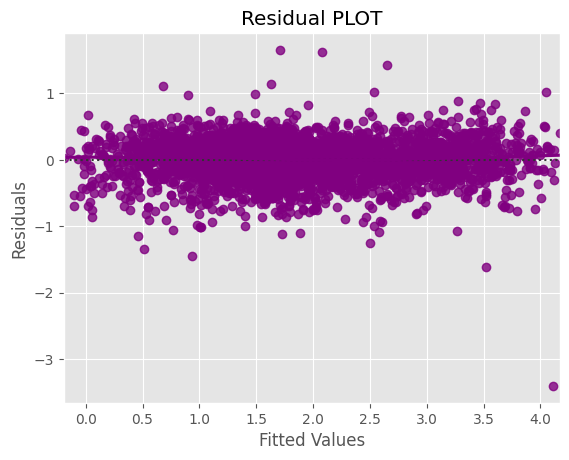

In [129]:
fitted = olsmodel2.fittedvalues
sns.residplot(x=fitted, y=residuals, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.ylabel("Residuals")
plt.title("Residual PLOT")
plt.show()



 Normality of error terms

C:\Users\maity\AppData\Local\Temp\ipykernel_17532\2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

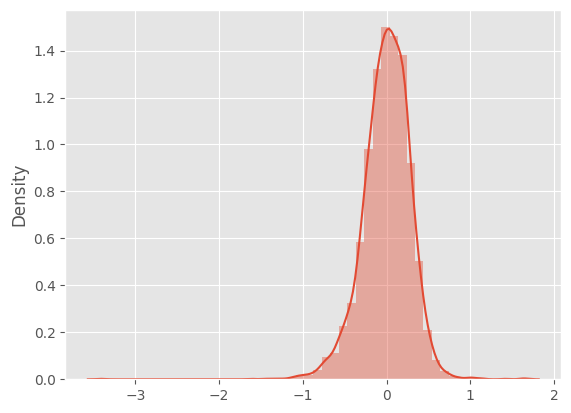

In [130]:
sns.distplot(residuals)

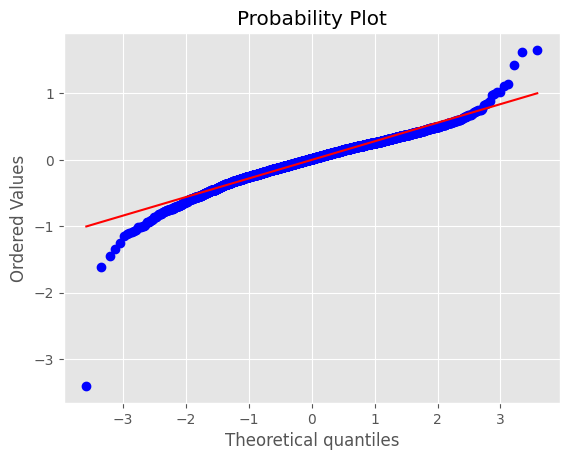

In [131]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

# Linear Regression

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
model = LinearRegression()

In [185]:
model.fit(X1_train,y_train)

LinearRegression()

In [186]:
y_pred = model.predict(X1_test)

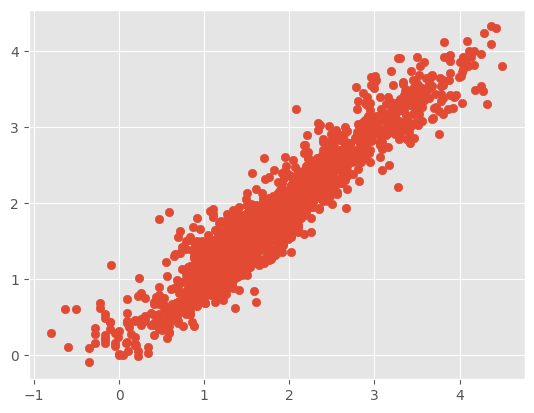

In [187]:
plt.scatter(y_test, y_pred)

In [188]:
r2 = metrics.r2_score(y_test,y_pred)

In [189]:
r2

0.8960422166730284

In [190]:
import math
rmse = math.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [191]:
rmse

0.28033993640595267

# Decesion Tree Regressor

In [202]:
DR = DecisionTreeRegressor()

In [203]:
DR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [204]:
y_pred = DR.predict(X_test)

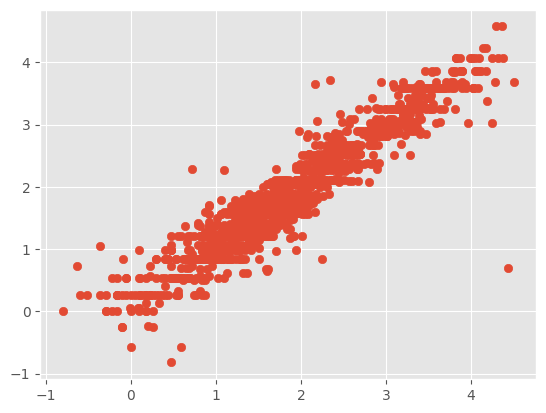

In [205]:
plt.scatter(y_test, y_pred)

In [206]:
r2_DR = metrics.r2_score(y_test, y_pred)
r2_DR

0.8952667149937824

In [196]:
rmse_DR = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse_DR

0.291818638345997

In [211]:
DR.fit(X_train, y_train).tree_.max_depth

8

# Randomforest regressor

In [147]:
from sklearn.ensemble import RandomForestRegressor

In [148]:
RF = RandomForestRegressor()

In [149]:
RF.fit(X_train, y_train)

RandomForestRegressor()

In [150]:
y_pred = RF.predict(X_test)

In [151]:
r2_RF = metrics.r2_score(y_test, y_pred)
r2_RF

0.9400606251478087

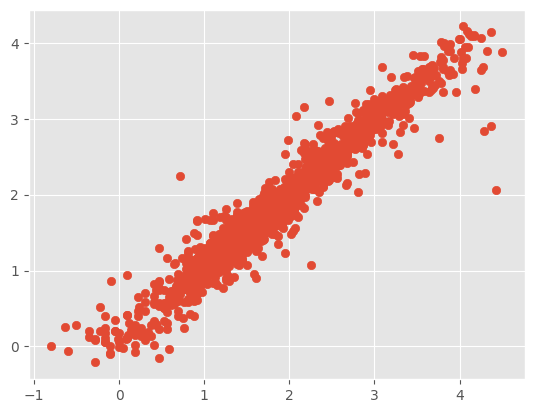

In [152]:
plt.scatter(y_test, y_pred)

In [153]:
rmse_RF = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse_RF

0.21286907341950304